In [1]:
import networkx as nx

In [2]:
# create undirected graph
uGraph = nx.Graph()

In [3]:
# add a single node
uGraph.add_node('a')

In [4]:
# add multiple nodes
uGraph.add_nodes_from(['a', 'b', 'c'])

In [5]:
# add an edge to the graph
uGraph.add_edge('a','b')

In [6]:
# add multiple edges
uGraph.add_edges_from([('a','c'),('b','c'),('c','d')])

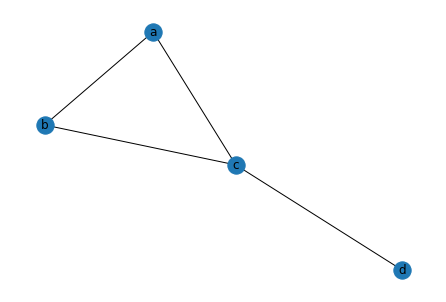

In [7]:
# draw the graph
nx.draw(uGraph, with_labels=True)

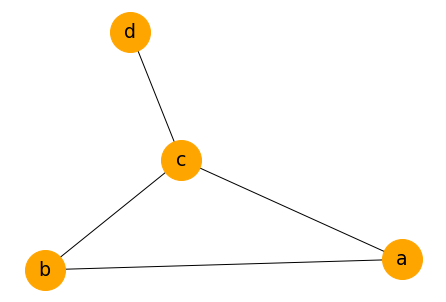

In [8]:
nx.draw(uGraph, with_labels=True, node_color="orange", node_size=1600, font_size=19)

In [9]:
# get all nodes of the graph
uGraph.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [10]:
#get all edges
uGraph.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

In [11]:
# print the nodes with for loop
for node in uGraph.nodes():
    print(node)

a
b
c
d


In [12]:
#print all edges with for loop
for edge in uGraph.edges():
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [13]:
# get the number of edges and nodes
print(uGraph.number_of_edges())
print(uGraph.number_of_nodes())

4
4


In [14]:
# get all the nighbours of a node
print(list(uGraph.neighbors('b')))

['a', 'c']


In [15]:
# print the neighbors using for loop
sideEffect = [print(n) for n in uGraph.neighbors('b')]

a
c


In [16]:
# check if the graph represents a tree or not
print(nx.is_tree(uGraph))

False


In [17]:
# check if the graph is connected
print(nx.is_connected(uGraph))

True


In [18]:
# check if a node exists in a graph
print(uGraph.has_node('a')) # this node exists
print(uGraph.has_node('e')) # this node doesn't exist

True
False


In [19]:
# check if two nodes are connected by edge
print(uGraph.has_edge('a','b')) # this edge exists
print(uGraph.has_edge('a','d')) # this edge doesn't exist

True
False


In [20]:
# you can also use the in operator to check if a node or an edge exists
print('a' in uGraph.nodes())
print(('a', 'b') in uGraph.edges())

True
True


# Node Degree

In [22]:
# node degree is simple how many nodes are connected with that node
print(len(list(uGraph.neighbors('a'))))
print(uGraph.degree('a')) 

2
2


## Exercise 1
write a function that takes a graph as an argument and returns a list of all the nodes with degree 1.

In [26]:
def get_leaves(G):
    return [node for node in G.nodes() if G.degree(node) ==1 ]

In [27]:
get_leaves(uGraph)

['d']

# side notes: python comprehensions

In [29]:
items = ['hello', 'world']
[item.upper() for item in items] # this will create new list with upper case

['HELLO', 'WORLD']

In [34]:
print([(n,uGraph.degree(n)) for n in uGraph.nodes()]) # print the degree of each node

[('a', 2), ('b', 2), ('c', 3), ('d', 1)]


In [37]:
# generator expressions are evaluated lazily
generatorExp = (len(item) for item in items)
list(generatorExp)

[5, 5]

In [38]:
max(len(item) for item in items)

5

In [39]:
sorted(item.upper() for item in items)

['HELLO', 'WORLD']

# node names


In [40]:
namedGraph = nx.Graph()

In [41]:
nodes = ['dog', 'cat', 13, 'virus']

In [42]:
namedGraph.add_nodes_from(nodes)

In [43]:
namedGraph.add_edge('dog', 'cat')

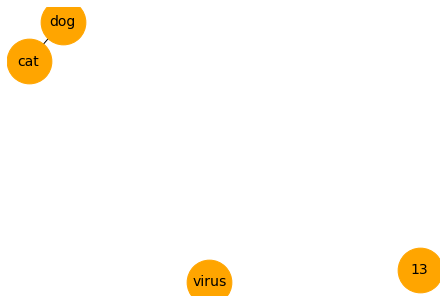

In [48]:
nx.draw(namedGraph, with_labels=True, font_size=14, node_size=2000, node_color='orange')

# adjacency list


In [50]:
fileGraph = nx.read_adjlist('nodes.adjlist')

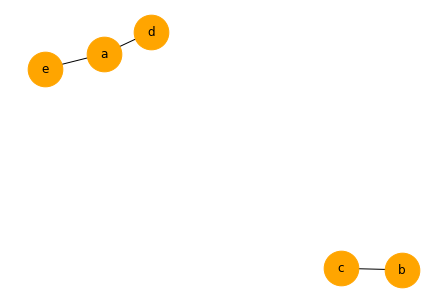

In [52]:
nx.draw(fileGraph, with_labels=True, node_size=1200, node_color='orange')

In [53]:
fileGraph.degree('a')

2

## Exercise2
write a function that takes a graph as its argument and returns 2-tuple with the name and the degree of the node with the max degree

In [128]:
def max_degree(G):
    (degree, name) = max([(G.degree(node),node) for node in G.nodes()])
    return (name, degree) 

In [129]:
max_degree(uGraph)

('c', 3)

## exercise 3

In [136]:
def mutual_friends(G, node1, node2):
    return [node for node in uGraph.nodes() if node in G.neighbors(node1) and node in G.neighbors(node2)]

In [137]:
mutual_friends(uGraph, 'c', 'a')

['b']

In [138]:
mutual_friends(uGraph, 'c', 'd')

[]

# Directed Graph

In [139]:
directedGraph = nx.DiGraph()

In [141]:
directedGraph.add_edges_from([('c','b'),('c','a'),('c','d'),('a','b')])

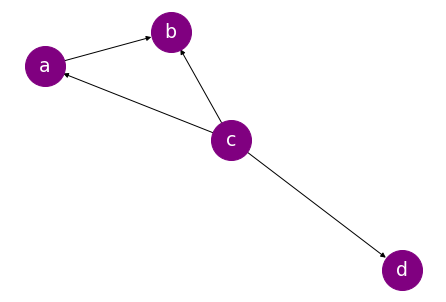

In [144]:
nx.draw(directedGraph, with_labels=True, node_color='purple', font_color='white', node_size=1600, font_size=19)

In [146]:
# note the edges are now directed for example:
print(directedGraph.has_edge('c','a')) #true
print(directedGraph.has_edge('a','c')) #false
print(uGraph.has_edge('a', 'c')) # undirected so true

True
False
True


In [150]:
# get the out-neighbors and in-neighbors of a node
print("out:", list(directedGraph.successors('a'))) # out-neighbors
print("in:", list(directedGraph.predecessors('a'))) # in-neighbors

out: ['b']
in: ['c']


In [153]:
# print the in and out degree of a node
print("in-degree =", directedGraph.in_degree('a'))
print("out-degree =", directedGraph.out_degree('a'))
print("in+out =", directedGraph.degree('a'))

in-degree = 1
out-degree = 1
in+out = 2
